# Exploratory Data Analysis Part 1

In this notebook, I determined that there was not enough user review data to build a robust collaborative filtering recommendation system.  



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv
from collections import Counter

### Make a df

## Reading in the User Reviews

Var `users` is just a count of the reviews written by an individual user.


In [2]:
with open(f'./review_data/reviews_list_100.json', 'r') as f:
        file = json.load(f)

In [3]:
users = Counter()
reviews = []
for i in range(0,26900, 100):
    with open(f'./review_data/reviews_list_{i}.json', 'r') as f:
        file = json.load(f)
        reviews.extend(file) # TODO implement this part.  Forgot to scrape the actual games that the review is for
    users.update([review['reviewer'] for review in file])


In [4]:
rev_df = pd.DataFrame(reviews)

In [5]:
rev_df.shape

(26864, 7)

### Checking to see how many reviews were about games in my list

In [6]:
with open("games_list.json", 'r') as f:
    games_list = json.load(f)
    
game_df = pd.DataFrame(games_list)

In [7]:
rev_df = pd.merge(game_df, rev_df, left_on='name', right_on='wikiObject')
rev_df.drop(['wikiObject', 'guid_y', 'site_detail_url'] ,1, inplace=True)

In [8]:
rev_df.shape

(3608, 6)

### Get number of users who have written at least `review_thresh` reviews

<Container object of 10 artists>

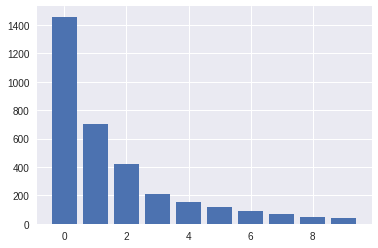

In [9]:
plt.bar([i for i in range(10)], [(rev_df.reviewer.value_counts()>i).sum() for i in range(0,10)])

In [10]:
(rev_df.reviewer.value_counts()>6).sum()

87

## Well that is not a lot... 

So it turns out that there are not enough user reviews to make a collaborative  filter.  At this point, I am changing my project to use a content filter.  